In [20]:
# Project Name :-> Electricity Consumption Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load dataset
df = pd.read_csv("CDCF.csv")    

# Display basic info
df.info()
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8354 entries, 0 to 8353
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Circle                8354 non-null   object 
 1   Division              8354 non-null   object 
 2   SubDivision           8354 non-null   object 
 3   Section               8354 non-null   object 
 4   Area                  8354 non-null   object 
 5   Category Code         8354 non-null   int64  
 6   Category Description  8354 non-null   object 
 7   Total Services        8354 non-null   int64  
 8   Billed Services       8354 non-null   int64  
 9   Units                 8354 non-null   int64  
 10  Load                  8354 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 718.1+ KB
        Circle     Division SubDivision       Section          Area  \
0  MAHABUBABAD  MAHABUBABAD       GUDUR  AYODHYAPURAM   DAMERVANCHA   
1  MAHABUBABAD  MAHABUBA

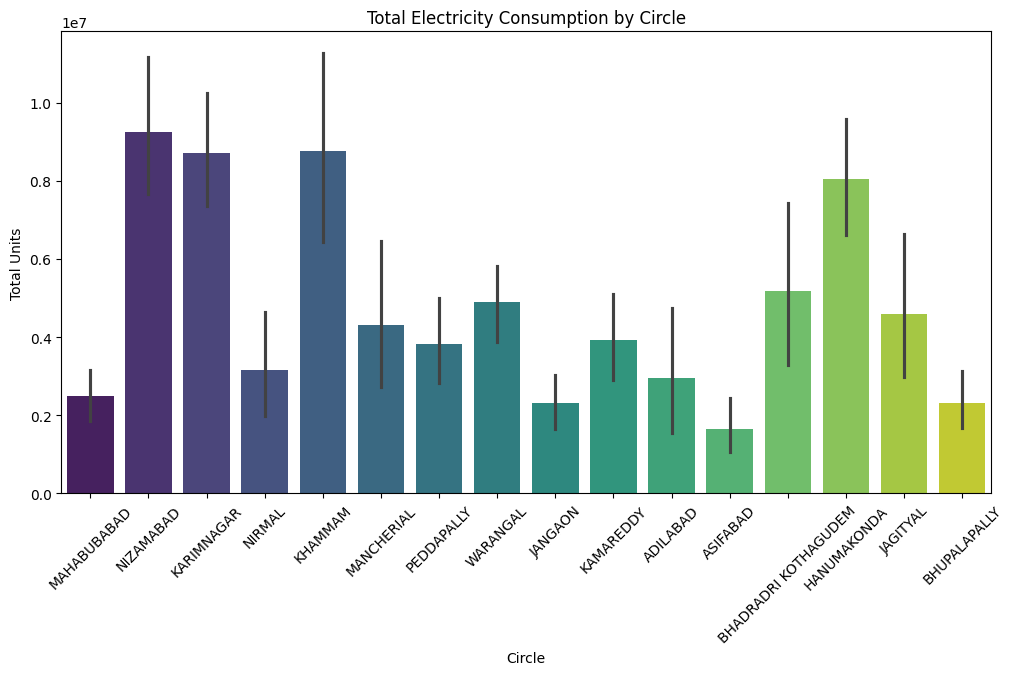

In [21]:
# Electricity consumption by Circle
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Circle'], y=df['Units'], estimator=sum, hue=df['Circle'], legend=False, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Electricity Consumption by Circle')                                                               
plt.xlabel('Circle')
plt.ylabel('Total Units')
plt.show()

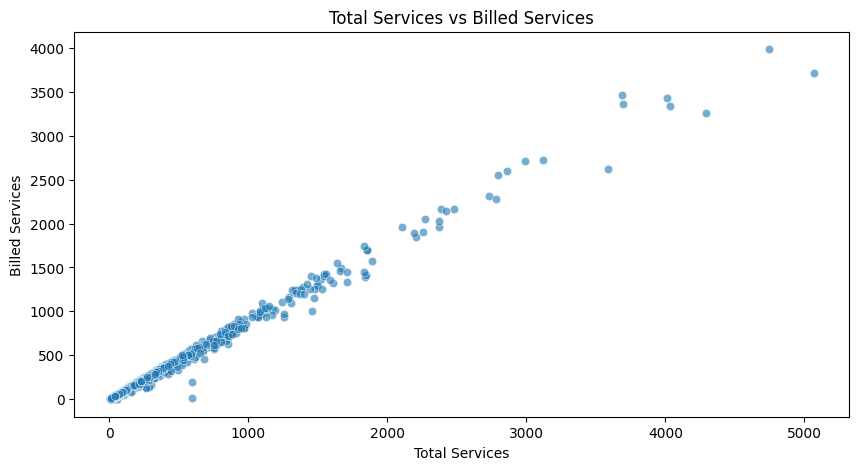

In [22]:
# Billed Services vs Total Services
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Total Services'], y=df['Billed Services'], alpha=0.6)
plt.title('Total Services vs Billed Services')
plt.xlabel('Total Services')
plt.ylabel('Billed Services')
plt.show()

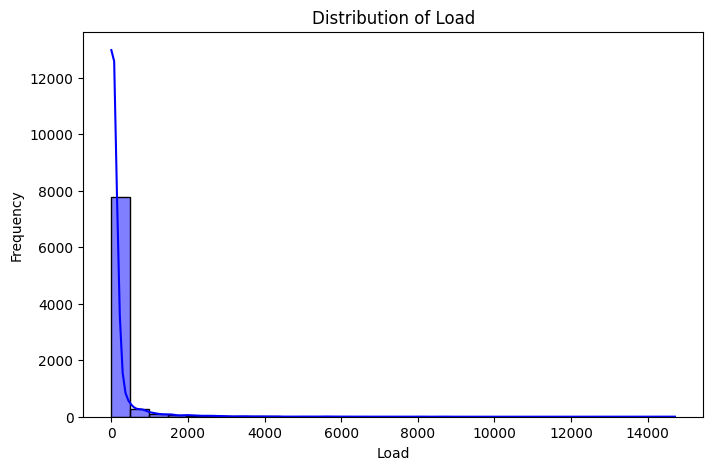

In [23]:
# Load distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Load'], bins=30, kde=True, color='blue')
plt.title('Distribution of Load')
plt.xlabel('Load')
plt.ylabel('Frequency')
plt.show()

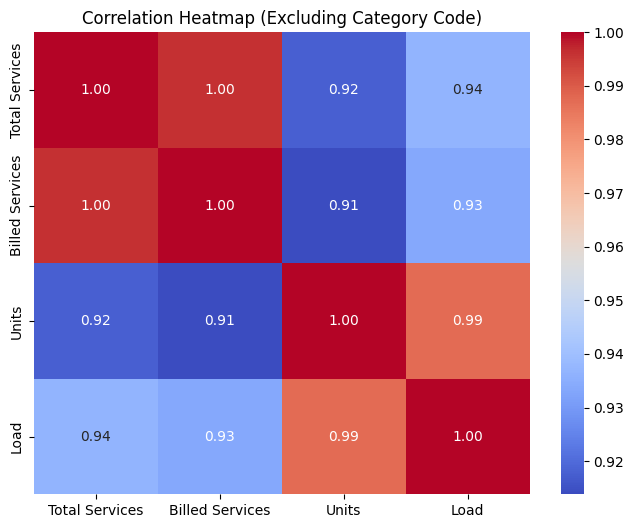

In [24]:

plt.figure(figsize=(8, 6))
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['Category Code'], errors='ignore')
numeric_corr = numeric_cols.corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap (Excluding Category Code)')
plt.show()


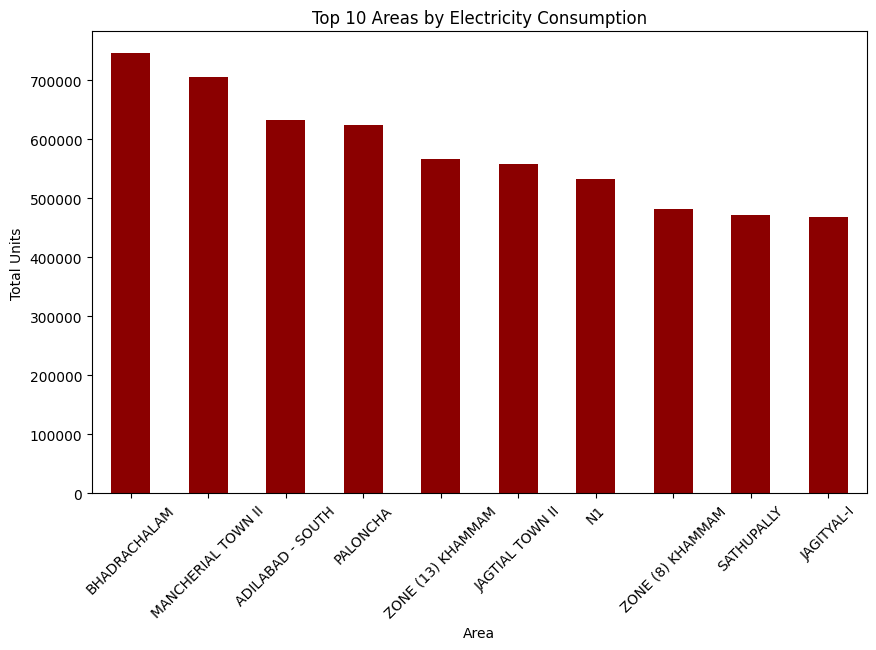

In [25]:
# Top 10 areas with highest electricity consumption
top_areas = df.groupby('Area')['Units'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_areas.plot(kind='bar', color='darkred')
plt.title('Top 10 Areas by Electricity Consumption')
plt.xlabel('Area')
plt.ylabel('Total Units')
plt.xticks(rotation=45)
plt.show()

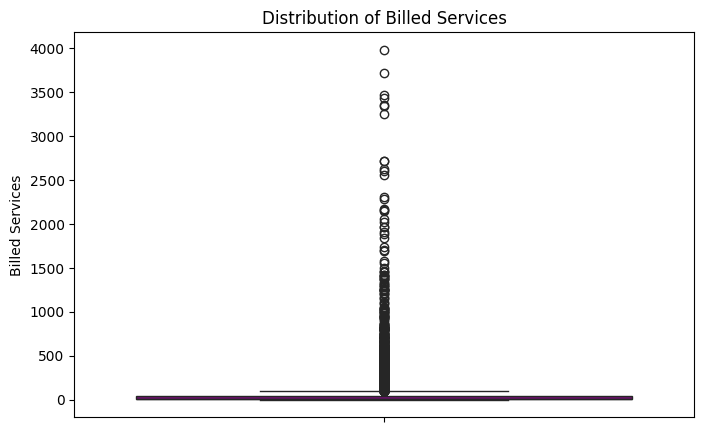

In [26]:
# Distribution of Billed Services
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Billed Services'], color='purple')
plt.title('Distribution of Billed Services')
plt.ylabel('Billed Services')
plt.show()

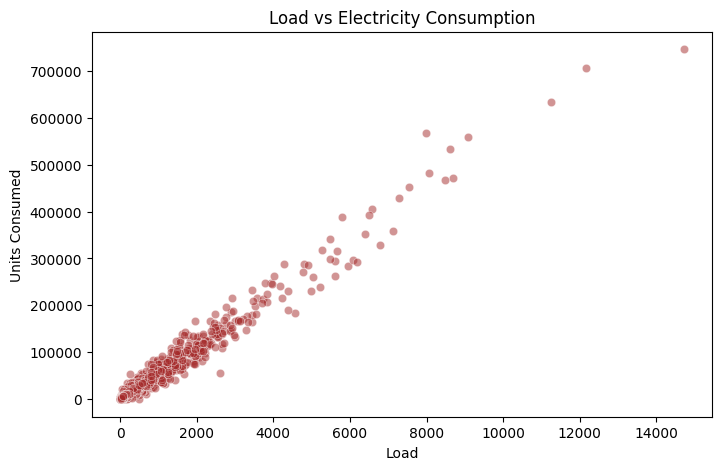

In [27]:
# Relationship between Load and Units consumed
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Load'], y=df['Units'], alpha=0.5, color='brown')
plt.title('Load vs Electricity Consumption')
plt.xlabel('Load')
plt.ylabel('Units Consumed')
plt.show()

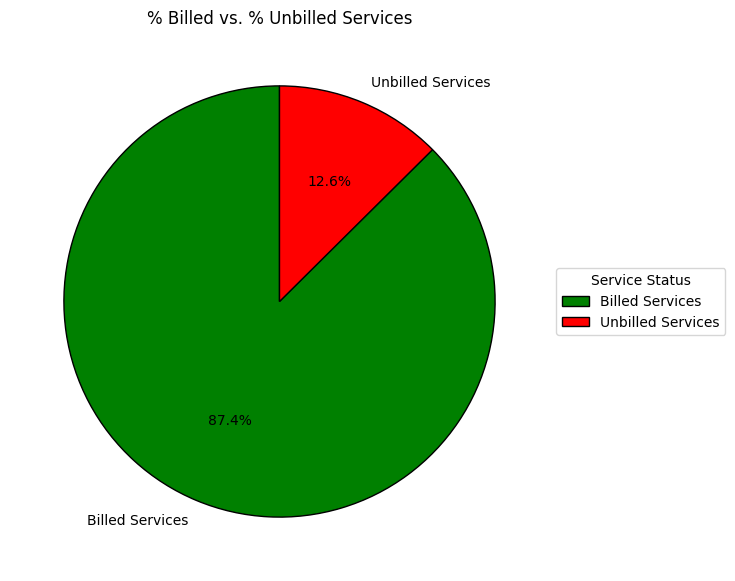

In [28]:
# Analyze % Billed Services
plt.figure(figsize=(7, 7))
billed_percentage = (df['Billed Services'].sum() / df['Total Services'].sum()) * 100
unbilled_percentage = 100 - billed_percentage
labels = ['Billed Services', 'Unbilled Services']
sizes = [billed_percentage, unbilled_percentage]
colors = ['green', 'red']
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.legend(wedges, labels, title="Service Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('% Billed vs. % Unbilled Services')
plt.show()